In [ ]:
!pip install pandas numpy scikit-learn xgboost


In [ ]:
# successful
import pandas as pd

# Path to the dataset in Google Drive
dataset_path = '/content/geneticdisorder.csv'

# Load the dataset
data = pd.read_csv(dataset_path)

# Display dataset info for verification
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 41 entries, ('Patient ID', 'Age', 'Smoker', "Mother's age", 'Infected from father', 'Maternal genes', 'Blood cell count (per microliter)', 'Paternal genes', 'Folic acid', "Mother's serious maternal illness", 'N/D radiation exposure (x-ray)', 'N/D substance abuse', 'Assisted conception (IVF/IUI)', 'History of anomalies in previous pregnancies', 'No. of previous abortion/stillbirths', 'Birth defects', 'White blood cell count (thousand per microliter)', 'Microglial cell count (per microliter)', 'Blood test result', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Genetic Disorder', 'Disorder Subclass') to ('PID00723', '0', 'No', 'No', 'No', 'No', '4.8618185', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', '0', 'No', '7.27377347', '1', 'abnormal', '1', '1', '1', '1', 'Mitochondrial genetic disorders', 'Mitochondrial myopathy')
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   ---------

Dataset loaded successfully!
  Patient ID  Age Smoker Mother's age Infected from father Maternal genes  \
0   PID00416    2     No          Yes                   No             No   
1   PID00428    1    Yes           No                  Yes             No   
2   PID00436   12     No           No                   No             No   
3   PID00441   11     No           No                   No             No   
4   PID00453   10     No           No                   No             No   

   Blood cell count (per microliter) Paternal genes Folic acid  \
0                           4.760224             No        Yes   
1                           4.959637             No        Yes   
2                           4.969835             No        Yes   
3                           4.782971             No        Yes   
4                           4.963978             No        Yes   

  Mother's serious maternal illness  ...  \
0                                No  ...   
1                      

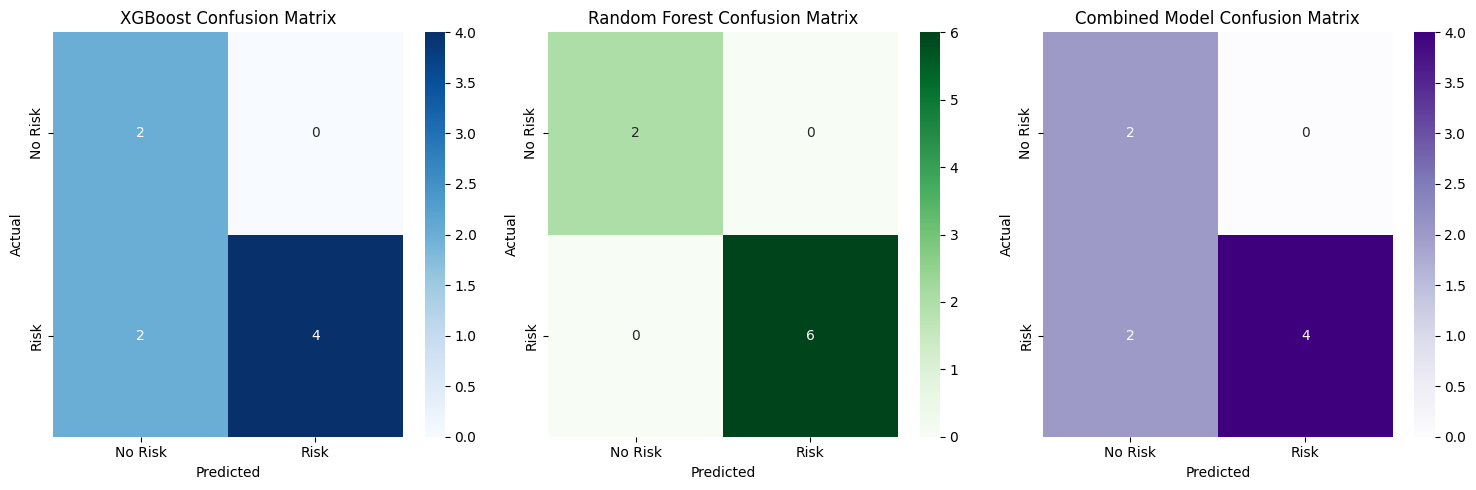

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the simulated dataset from the CSV file
try:
    data = pd.read_csv('geneticdata.csv')
    print("Dataset loaded successfully!")
    print(data.head())
    print("\n" + "="*30 + "\n")

    # Define the target column
    target_column = 'Risk'

    # Separate features (X) and target (y)
    columns_to_drop = ['Risk', 'Patient ID', 'Genetic Disorder', 'Disorder Subclass']
    existing_columns = [col.strip() for col in data.columns] # Clean up column names

    columns_to_drop_present = [col for col in columns_to_drop if col.strip() in existing_columns]
    X = data.drop(columns=columns_to_drop_present)
    y = data[target_column]

    # Handle categorical features using one-hot encoding
    X = pd.get_dummies(X, drop_first=True)
    print("Features after one-hot encoding:")
    print(X.head())
    print("\n" + "="*30 + "\n")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")
    print("\n" + "="*30 + "\n")

    # Initialize and train the XGBoost model
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    print("XGBoost model trained.")

    # Make predictions with XGBoost
    xgb_pred = xgb_model.predict(X_test)
    xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

    # Evaluate XGBoost
    xgb_accuracy = accuracy_score(y_test, xgb_pred)
    print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")
    print("XGBoost Classification Report:")
    print(classification_report(y_test, xgb_pred))
    xgb_cm = confusion_matrix(y_test, xgb_pred)

    # Initialize and train the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    print("\nRandom Forest model trained.")

    # Make predictions with Random Forest
    rf_pred = rf_model.predict(X_test)
    rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

    # Evaluate Random Forest
    rf_accuracy = accuracy_score(y_test, rf_pred)
    print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
    print("Random Forest Classification Report:")
    print(classification_report(y_test, rf_pred))
    rf_cm = confusion_matrix(y_test, rf_pred)

    # Combine predictions (soft voting - averaging probabilities)
    combined_pred_proba = (0.5 * xgb_pred_proba) + (0.5 * rf_pred_proba)
    threshold = 0.5
    combined_pred = (combined_pred_proba >= threshold).astype(int)

    # Evaluate the combined model
    combined_accuracy = accuracy_score(y_test, combined_pred)
    print(f"\nCombined Model Accuracy: {combined_accuracy * 100:.2f}%")
    print("Combined Model Classification Report:")
    print(classification_report(y_test, combined_pred))
    combined_cm = confusion_matrix(y_test, combined_pred)

    # --- Visualization ---
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
    plt.title('XGBoost Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.subplot(1, 3, 2)
    sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
    plt.title('Random Forest Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.subplot(1, 3, 3)
    sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Purples',
                xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
    plt.title('Combined Model Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: The file 'genetic_disorder_data.csv' was not found. Please make sure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")